In [1]:
import pandas as pd
import numpy as np
import re

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# read data
data = pd.read_csv('mbti_personality.csv') 

## Data preview

In [2]:
data.head(10)

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6  INFJ  'No, I can't draw on my own nails (haha). Thos...
7  INTJ  'I tend to build up a collection of things on ...
8  INFJ  I'm not sure, that's a good question. The dist...
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...

### List of posts

In [6]:
[p.split('|||') for p in data.head(2).posts.values]

[["'http://www.youtube.com/watch?v=qsXHcwe3krw",
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04

## Distribution of the MBTI personality types

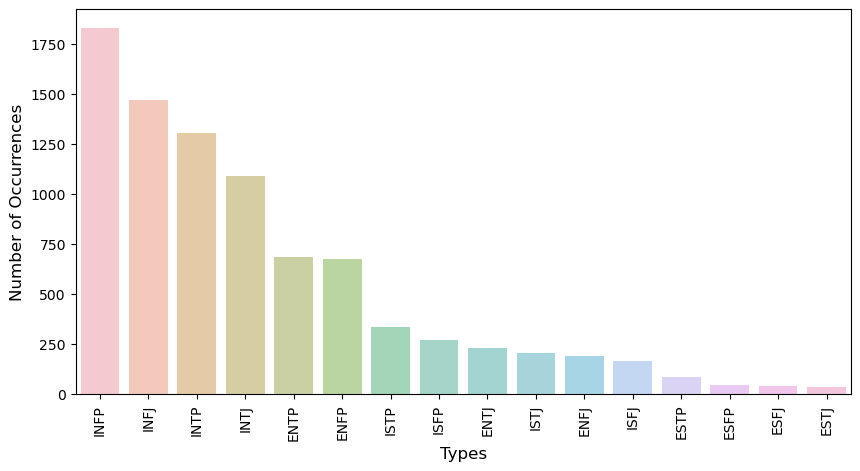

In [89]:
# Count the occurrences of each type
count_types = data['type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=count_types.index, y=count_types.values, alpha=0.5)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.xticks(rotation='vertical')  # Rotate x-labels for better readability
plt.show()


In [90]:
types = np.unique(np.array(df['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [64]:
total = df.groupby(['type']).count().sort_values(by=['posts'],ascending=False)
total

posts    IE    NS    TF    JP  words_per_comment  \
type                                                     
INFP   1832  1832  1832  1832  1832               1832   
INFJ   1470  1470  1470  1470  1470               1470   
INTP   1304  1304  1304  1304  1304               1304   
INTJ   1091  1091  1091  1091  1091               1091   
ENTP    685   685   685   685   685                685   
ENFP    675   675   675   675   675                675   
ISTP    337   337   337   337   337                337   
ISFP    271   271   271   271   271                271   
ENTJ    231   231   231   231   231                231   
ISTJ    205   205   205   205   205                205   
ENFJ    190   190   190   190   190                190   
ISFJ    166   166   166   166   166                166   
ESTP     89    89    89    89    89                 89   
ESFP     48    48    48    48    48                 48   
ESFJ     42    42    42    42    42                 42   
ESTJ     39    39    39    39    39                 39   

      variance_of_word_counts  
type                           
INFP                     1832  
INFJ                     1470  
INTP                     1304  
INTJ                     1091  
ENTP                      685  
ENFP                      675  
ISTP                      337  
ISFP                      271  
ENTJ                      231  
ISTJ                      205  
ENFJ                      190  
ISFJ                      166  
ESTP                       89  
ESFP                       48  
ESFJ                       42  
ESTJ                       39

In [69]:
types = np.unique(np.array(df['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [74]:
def extract(posts, new_posts):
    for post in posts[1].split("|||"):
        new_posts.append((posts[0], post))

posts = []
df.apply(lambda x: extract(x, posts), axis=1)
print("Number of users", len(df))
print("Number of posts", len(posts))
print("5 posts from start are:")
posts[0:5]

Number of users 8675
Number of posts 422845
5 posts from start are:


[('INFJ', "'http://www.youtube.com/watch?v=qsXHcwe3krw"),
 ('INFJ', 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg'),
 ('INFJ',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks'),
 ('INFJ', 'What has been the most life-changing experience in your life?'),
 ('INFJ',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.')]

In [83]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import collections
from collections import Counter

In [84]:
words = list(df["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(10)

[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263)]

C:\Users\DELL\AppData\Local\Temp\ipykernel_10980\2895893220.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,k+1)


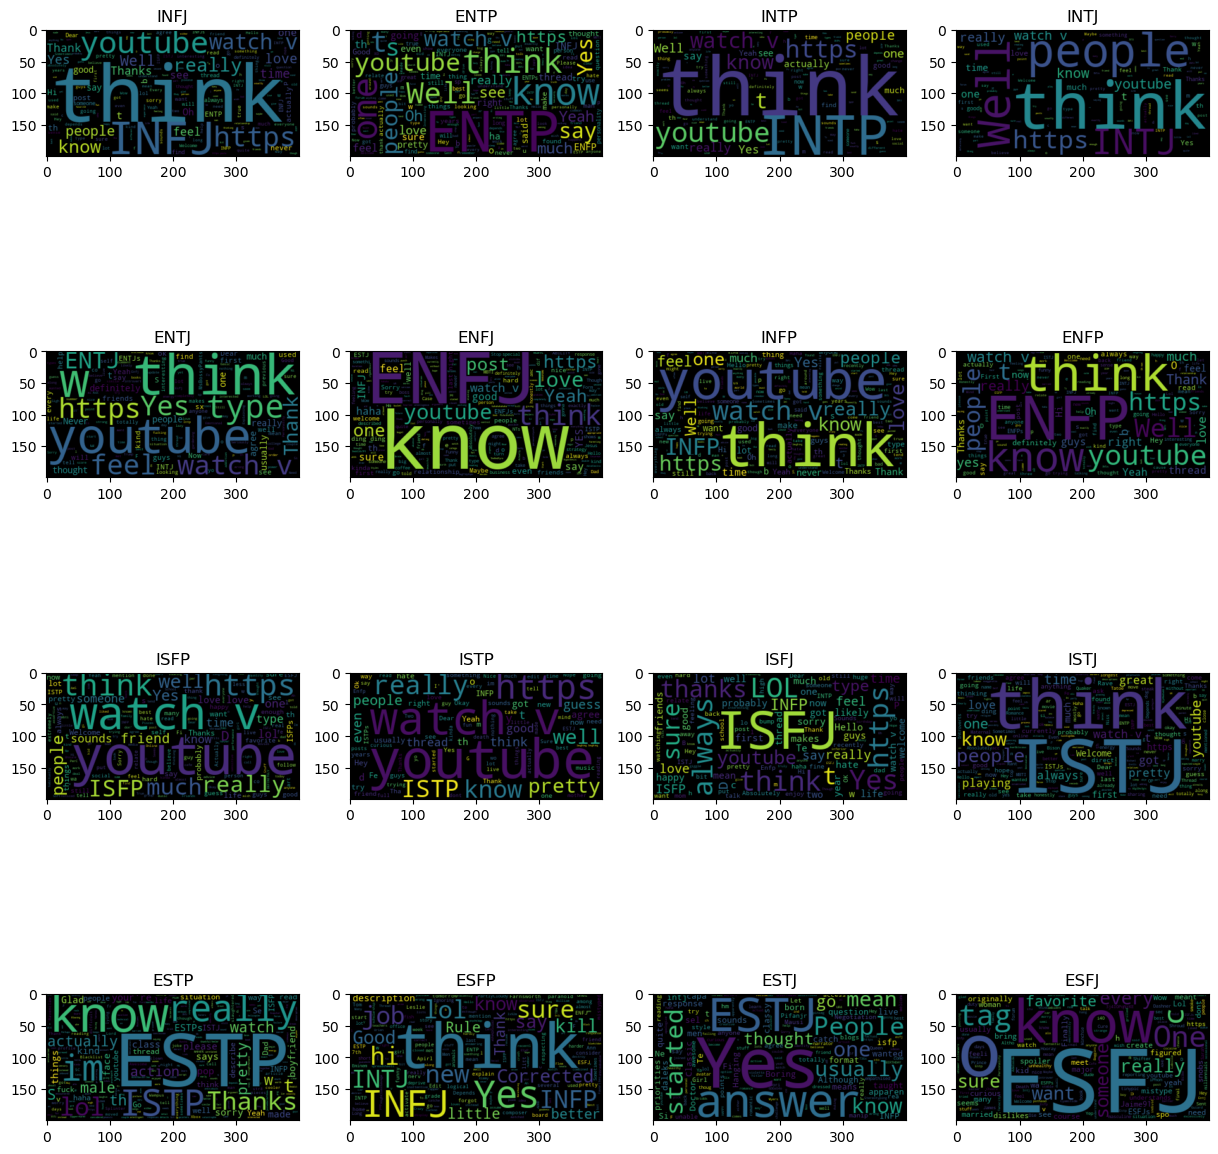

In [86]:
fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,len(df['type'].unique())))
k = 0
for i in df['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [87]:
import plotly.express as px

In [88]:
px.pie(data,names='type',title='Distribution of personality types',hole=0.3)

In [10]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E incorrect')
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S incorrect')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F incorrect')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

data = data.join(data.apply (lambda row: get_types (row),axis=1))
data.head(5)

type                                              posts  IE  NS  TF  JP
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   1   1   0   1
1  ENTP  'I'm finding the lack of me in these posts ver...   0   1   1   0
2  INTP  'Good one  _____   https://www.youtube.com/wat...   1   1   1   0
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   1   1   1   1
4  ENTJ  'You're fired.|||That's another silly misconce...   0   1   1   1

In [11]:
print ("Introversion (I) /  Extroversion (E):\t", data['IE'].value_counts()[0], " / ", data['IE'].value_counts()[1])
print ("Intuition (N) – Sensing (S):\t\t", data['NS'].value_counts()[0], " / ", data['NS'].value_counts()[1])
print ("Thinking (T) – Feeling (F):\t\t", data['TF'].value_counts()[0], " / ", data['TF'].value_counts()[1])
print ("Judging (J) – Perceiving (P):\t\t", data['JP'].value_counts()[0], " / ", data['JP'].value_counts()[1])

Introversion (I) /  Extroversion (E):	 1999  /  6676
Intuition (N) – Sensing (S):		 1197  /  7478
Thinking (T) – Feeling (F):		 4694  /  3981
Judging (J) – Perceiving (P):		 5241  /  3434


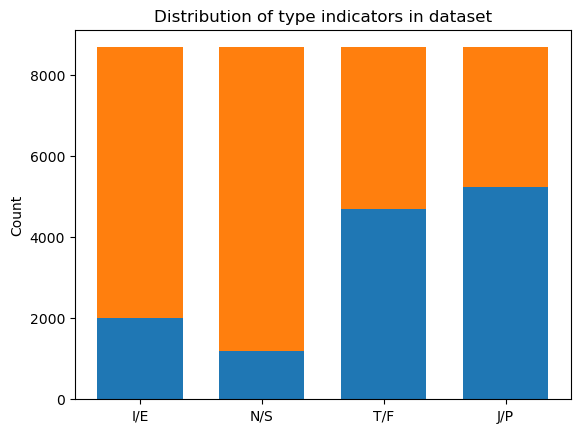

In [110]:
Num = 4
bot = (data['IE'].value_counts()[0], data['NS'].value_counts()[0], data['TF'].value_counts()[0], data['JP'].value_counts()[0])
top = (data['IE'].value_counts()[1], data['NS'].value_counts()[1], data['TF'].value_counts()[1], data['JP'].value_counts()[1])

ind = np.arange(Num)    # the x locations for the groups
width = 0.7      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, bot, width)
p2 = plt.bar(ind, top, width, bottom=bot)

plt.ylabel('Count')
plt.title('Distribution of type indicators in dataset')
plt.xticks(ind, ('I/E',  'N/S', 'T/F', 'J/P',))

plt.show()

In [104]:
b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    
    return [b_Pers[l] for l in personality]

def translate_back(personality):
    # transform binary vector to mbti personality
    
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

d = data.head(4)
list_personality_bin = np.array([translate_personality(p) for p in d.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 [0 0 1 0]]


In [21]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


True

In [22]:
##### Compute list of subject with Type | list of comments 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk import word_tokenize

# We want to remove these from the psosts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
  
unique_type_list = [x.lower() for x in unique_type_list]


# Lemmatize
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

# Cache the stop words for speed 
cachedStopWords = stopwords.words("english")

def pre_process_data(data, remove_stop_words=True, remove_mbti_profiles=True):

    list_personality = []
    list_posts = []
    len_data = len(data)
    i=0
    
    for row in data.iterrows():
        i+=1
        if (i % 500 == 0 or i == 1 or i == len_data):
            print("%s of %s rows" % (i, len_data))

        ##### Remove and clean comments
        posts = row[1].posts
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +', ' ', temp).lower()
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
            
        if remove_mbti_profiles:
            for t in unique_type_list:
                temp = temp.replace(t,"")

        type_labelized = translate_personality(row[1].type)
        list_personality.append(type_labelized)
        list_posts.append(temp)

    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality

In [23]:
list_posts, list_personality  = pre_process_data(data, remove_stop_words=True)

1 of 8675 rows
500 of 8675 rows
1000 of 8675 rows
1500 of 8675 rows
2000 of 8675 rows
2500 of 8675 rows
3000 of 8675 rows
3500 of 8675 rows
4000 of 8675 rows
4500 of 8675 rows
5000 of 8675 rows
5500 of 8675 rows
6000 of 8675 rows
6500 of 8675 rows
7000 of 8675 rows
7500 of 8675 rows
8000 of 8675 rows
8500 of 8675 rows
8675 of 8675 rows


In [24]:
print("Num posts and personalities: ",  list_posts.shape, list_personality.shape)

Num posts and personalities:  (8675,) (8675, 4)


In [25]:
list_posts[0]

'   moment sportscenter top ten play prank life changing experience life repeat today may perc experience immerse last thing  friend posted facebook committing suicide next day rest peace hello  sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth welcome stuff game set match prozac wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier alternative basically come three item determined type whichever type want would likely use given type cognitive function whatnot left thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear  favorite video game growing current favorite video game cool appears late sad someone everyone wait thought confidence good thing cherish time solitude b c revel within inner world whereas time workin enjoy time worry people always around yo  lady complimentary personality well h

In [26]:
list_personality[0]

array([0, 0, 0, 0])

### Vectorize with count and tf-idf

Keep words appearing in 10% to 70 % of the posts.

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

# Posts to a matrix of token counts
cntizer = CountVectorizer(analyzer="word", 
                             max_features=1500, 
                             tokenizer=None,    
                             preprocessor=None, 
                             stop_words=None,  
                             max_df=0.7,
                             min_df=0.1, random_state) 

# Learn the vocabulary dictionary and return term-document matrix
print("CountVectorizer...")
X_cnt = cntizer.fit_transform(list_posts)

# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

print("Tf-idf...")
# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()

CountVectorizer...
Tf-idf...


In [37]:
feature_names = list(enumerate(cntizer.get_feature_names_out()))
feature_names

[(0, 'ability'),
 (1, 'able'),
 (2, 'absolutely'),
 (3, 'accept'),
 (4, 'accurate'),
 (5, 'across'),
 (6, 'act'),
 (7, 'action'),
 (8, 'actual'),
 (9, 'actually'),
 (10, 'add'),
 (11, 'admit'),
 (12, 'advice'),
 (13, 'afraid'),
 (14, 'age'),
 (15, 'ago'),
 (16, 'agree'),
 (17, 'ah'),
 (18, 'almost'),
 (19, 'alone'),
 (20, 'along'),
 (21, 'already'),
 (22, 'although'),
 (23, 'amazing'),
 (24, 'amount'),
 (25, 'angry'),
 (26, 'animal'),
 (27, 'annoying'),
 (28, 'another'),
 (29, 'answer'),
 (30, 'anxiety'),
 (31, 'anymore'),
 (32, 'anyone'),
 (33, 'anything'),
 (34, 'anyway'),
 (35, 'apparently'),
 (36, 'appreciate'),
 (37, 'approach'),
 (38, 'area'),
 (39, 'argument'),
 (40, 'around'),
 (41, 'art'),
 (42, 'ask'),
 (43, 'asked'),
 (44, 'asking'),
 (45, 'aspect'),
 (46, 'assume'),
 (47, 'attention'),
 (48, 'attracted'),
 (49, 'avatar'),
 (50, 'avoid'),
 (51, 'aware'),
 (52, 'away'),
 (53, 'awesome'),
 (54, 'awkward'),
 (55, 'baby'),
 (56, 'back'),
 (57, 'bad'),
 (58, 'based'),
 (59, 'basi

In [38]:
X_tfidf.shape

(8675, 791)

In [39]:
print("X: Posts in tf-idf representation \n* 1st row:\n%s" % X_tfidf[0])

X: Posts in tf-idf representation 
* 1st row:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.08042209 0.06830218 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.10331537 0.         0.04973404 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.10984584 0.         0.         0.         0.08642509
 0.         0.         0.10488948 0.         0.         0.
 0.         0.         0.05188886 0.06824736 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0

In [40]:
type_indicators = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) – Sensing (S)", 
                   "FT: Feeling (F) - Thinking (T)", "JP: Judging (J) – Perceiving (P)"  ]

for l in range(len(type_indicators)):
    print(type_indicators[l])


IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) – Sensing (S)
FT: Feeling (F) - Thinking (T)
JP: Judging (J) – Perceiving (P)


In [41]:
print("MBTI 1st row: %s" % translate_back(list_personality[0,:]))
print("Y: Binarized MBTI 1st row: %s" % list_personality[0,:])


MBTI 1st row: INFJ
Y: Binarized MBTI 1st row: [0 0 0 0]


In [42]:
pip install XGBoost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [44]:
# First XGBoost model for MBTI dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Posts in tf-idf representation
X = X_tfidf

# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    # Let's train type indicator individually
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fit model on training data
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) ...
* IE: Introversion (I) / Extroversion (E) Accuracy: 78.06%
NS: Intuition (N) – Sensing (S) ...
* NS: Intuition (N) – Sensing (S) Accuracy: 85.89%
FT: Feeling (F) - Thinking (T) ...
* FT: Feeling (F) - Thinking (T) Accuracy: 72.83%
JP: Judging (J) – Perceiving (P) ...
* JP: Judging (J) – Perceiving (P) Accuracy: 63.43%


In [45]:
# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 200
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fit model on training data
    model = XGBClassifier()
    eval_set = [(X_test, y_test)]
    model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators[l], accuracy * 100.0))
    
    

IE: Introversion (I) / Extroversion (E) ...


C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.60846
[1]	validation_0-logloss:0.56733
[2]	validation_0-logloss:0.54272
[3]	validation_0-logloss:0.53047
[4]	validation_0-logloss:0.52343
[5]	validation_0-logloss:0.51792
[6]	validation_0-logloss:0.51321
[7]	validation_0-logloss:0.51397
[8]	validation_0-logloss:0.51347
[9]	validation_0-logloss:0.51266
[10]	validation_0-logloss:0.51036
[11]	validation_0-logloss:0.51225
[12]	validation_0-logloss:0.51369
[13]	validation_0-logloss:0.51236
[14]	validation_0-logloss:0.51188
[15]	validation_0-logloss:0.51248
[16]	validation_0-logloss:0.51100
[17]	validation_0-logloss:0.51053
[18]	validation_0-logloss:0.51044
[19]	validation_0-logloss:0.51093
* IE: Introversion (I) / Extroversion (E) Accuracy: 77.47%
NS: Intuition (N) – Sensing (S) ...


C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.55702
[1]	validation_0-logloss:0.48679
[2]	validation_0-logloss:0.44576
[3]	validation_0-logloss:0.41969
[4]	validation_0-logloss:0.40669
[5]	validation_0-logloss:0.39926
[6]	validation_0-logloss:0.39390
[7]	validation_0-logloss:0.39172
[8]	validation_0-logloss:0.38809
[9]	validation_0-logloss:0.38767
[10]	validation_0-logloss:0.38759
[11]	validation_0-logloss:0.38908
[12]	validation_0-logloss:0.38807
[13]	validation_0-logloss:0.38682
[14]	validation_0-logloss:0.38983
[15]	validation_0-logloss:0.39438
[16]	validation_0-logloss:0.39508
[17]	validation_0-logloss:0.39565
[18]	validation_0-logloss:0.39478
[19]	validation_0-logloss:0.39568
[20]	validation_0-logloss:0.39807
[21]	validation_0-logloss:0.39927
[22]	validation_0-logloss:0.40111
[23]	validation_0-logloss:0.40089
* NS: Intuition (N) – Sensing (S) Accuracy: 85.85%
FT: Feeling (F) - Thinking (T) ...


C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.66920
[1]	validation_0-logloss:0.65176
[2]	validation_0-logloss:0.63873
[3]	validation_0-logloss:0.62824
[4]	validation_0-logloss:0.62181
[5]	validation_0-logloss:0.61586
[6]	validation_0-logloss:0.60997
[7]	validation_0-logloss:0.60115
[8]	validation_0-logloss:0.59526
[9]	validation_0-logloss:0.59093
[10]	validation_0-logloss:0.59013
[11]	validation_0-logloss:0.58937
[12]	validation_0-logloss:0.58451
[13]	validation_0-logloss:0.58293
[14]	validation_0-logloss:0.58050
[15]	validation_0-logloss:0.57901
[16]	validation_0-logloss:0.57771
[17]	validation_0-logloss:0.57638
[18]	validation_0-logloss:0.57493
[19]	validation_0-logloss:0.57427
[20]	validation_0-logloss:0.57442
[21]	validation_0-logloss:0.57426
[22]	validation_0-logloss:0.57578
[23]	validation_0-logloss:0.57628
[24]	validation_0-logloss:0.57666
[25]	validation_0-logloss:0.57545
[26]	validation_0-logloss:0.57565
[27]	validation_0-logloss:0.57486
[28]	validation_0-logloss:0.57626
[29]	validation_0-loglos

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.66832
[1]	validation_0-logloss:0.65648
[2]	validation_0-logloss:0.65019
[3]	validation_0-logloss:0.64751
[4]	validation_0-logloss:0.64782
[5]	validation_0-logloss:0.64693
[6]	validation_0-logloss:0.64563
[7]	validation_0-logloss:0.64630
[8]	validation_0-logloss:0.64631
[9]	validation_0-logloss:0.64806
[10]	validation_0-logloss:0.64787
[11]	validation_0-logloss:0.64671
[12]	validation_0-logloss:0.64708
[13]	validation_0-logloss:0.64661
[14]	validation_0-logloss:0.64901
[15]	validation_0-logloss:0.64942
* JP: Judging (J) – Perceiving (P) Accuracy: 63.71%


In [47]:

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


In [111]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

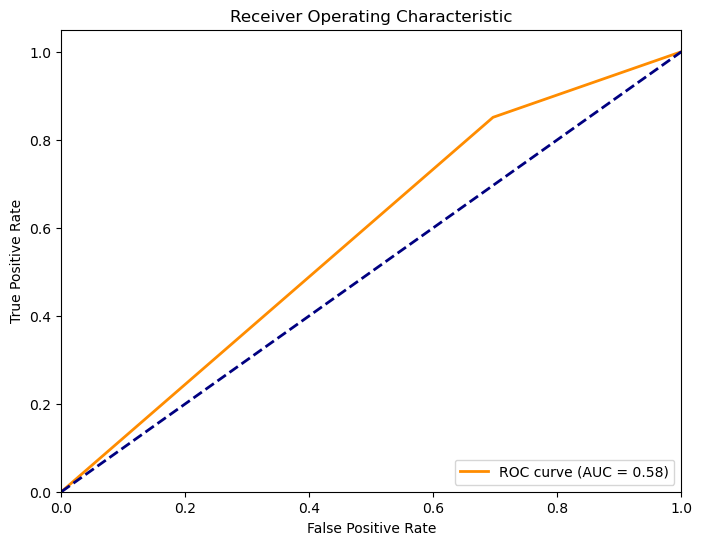

In [49]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [123]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Posts in tf-idf representation
X = X_tfidf

# Initialize XGBoost model parameters
model_params = {}

# Initialize StratifiedKFold
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store accuracy scores for each fold
accuracy_scores = []

# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    # Let's train type indicator individually
    Y = list_personality[:, l]

    # Initialize lists to store fold predictions and true labels
    fold_predictions = []
    fold_true_labels = []

    # Perform k-fold cross-validation
    for fold_idx, (train_idx, val_idx) in enumerate(skf.split(X, Y)):
        print(f"Fold {fold_idx + 1}")

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = Y[train_idx], Y[val_idx]

        # Initialize and train XGBoost model
        model = XGBClassifier(**model_params)
        model.fit(X_train, y_train)

        # Make predictions on validation data
        y_pred = model.predict(X_val)
        fold_predictions.extend(y_pred)
        fold_true_labels.extend(y_val)

        # Calculate accuracy for this fold
        fold_accuracy = accuracy_score(y_val, y_pred)
        print(f"Fold Accuracy: {fold_accuracy:.2f}")

    # Calculate accuracy across all folds for this indicator
    overall_accuracy = accuracy_score(fold_true_labels, fold_predictions)
    accuracy_scores.append(overall_accuracy)
    print(f"* {type_indicators[l]} Overall Accuracy: {overall_accuracy:.2f}")

# Calculate and print average accuracy across all indicators
average_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy: {average_accuracy:.2f}")


IE: Introversion (I) / Extroversion (E) ...
Fold 1
Fold Accuracy: 0.77
Fold 2
Fold Accuracy: 0.77
Fold 3
Fold Accuracy: 0.78
Fold 4
Fold Accuracy: 0.77
Fold 5
Fold Accuracy: 0.77
* IE: Introversion (I) / Extroversion (E) Overall Accuracy: 0.77
NS: Intuition (N) – Sensing (S) ...
Fold 1
Fold Accuracy: 0.86
Fold 2
Fold Accuracy: 0.86
Fold 3
Fold Accuracy: 0.86
Fold 4
Fold Accuracy: 0.86
Fold 5
Fold Accuracy: 0.86
* NS: Intuition (N) – Sensing (S) Overall Accuracy: 0.86
FT: Feeling (F) - Thinking (T) ...
Fold 1
Fold Accuracy: 0.73
Fold 2
Fold Accuracy: 0.72
Fold 3
Fold Accuracy: 0.72
Fold 4
Fold Accuracy: 0.75
Fold 5
Fold Accuracy: 0.72
* FT: Feeling (F) - Thinking (T) Overall Accuracy: 0.73
JP: Judging (J) – Perceiving (P) ...
Fold 1
Fold Accuracy: 0.66
Fold 2
Fold Accuracy: 0.63
Fold 3
Fold Accuracy: 0.63
Fold 4
Fold Accuracy: 0.65
Fold 5
Fold Accuracy: 0.64
* JP: Judging (J) – Perceiving (P) Overall Accuracy: 0.64
Average Accuracy: 0.75


In [92]:
def plot_confusion_matrix(
        cm, 
        classes,
        normalize=False,
        title="Confusion Matrix",
        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize: 
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

IE: Introversion (I) / Extroversion (E) ...
* IE: Introversion (I) / Extroversion (E) Accuracy: 79.01%
Confusion matrix, without normalization
[[2172   57]
 [ 544   90]]


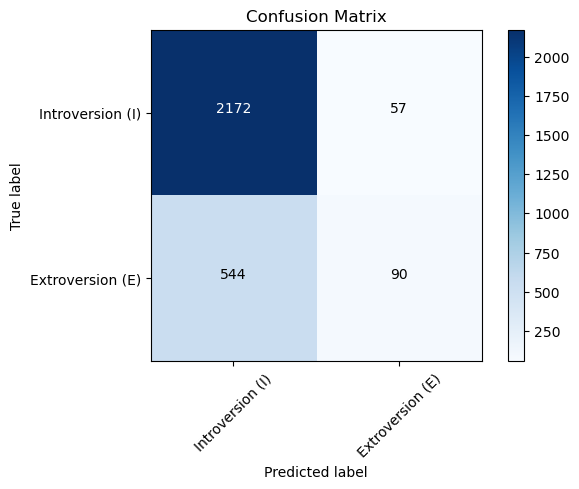

NS: Intuition (N) – Sensing (S) ...
* NS: Intuition (N) – Sensing (S) Accuracy: 85.96%
Confusion matrix, without normalization
[[2454    9]
 [ 393    7]]


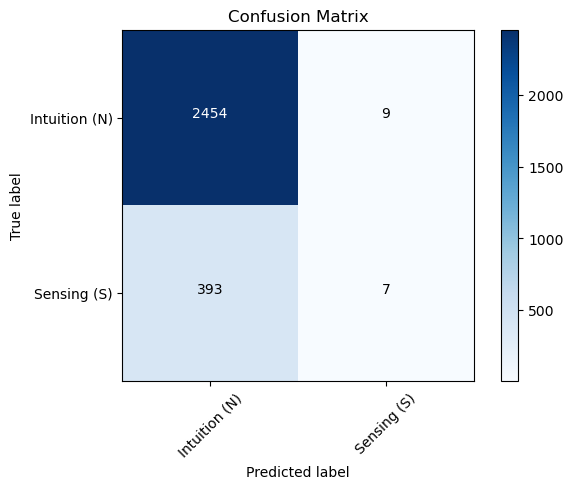

FT: Feeling (F) - Thinking (T) ...
* FT: Feeling (F) - Thinking (T) Accuracy: 74.19%
Confusion matrix, without normalization
[[1194  360]
 [ 379  930]]


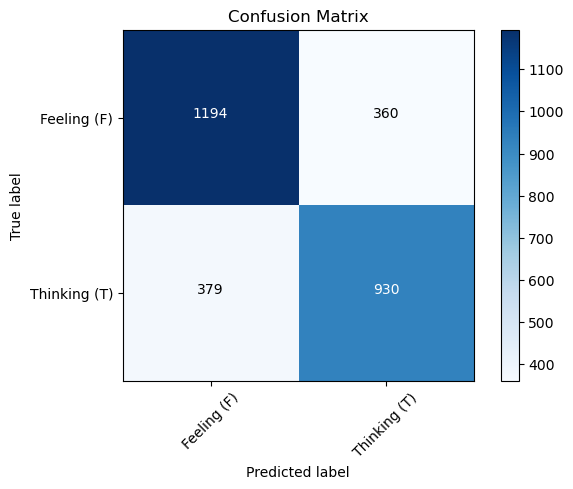

JP: Judging (J) – Perceiving (P) ...
* JP: Judging (J) – Perceiving (P) Accuracy: 65.42%
Confusion matrix, without normalization
[[ 429  690]
 [ 300 1444]]


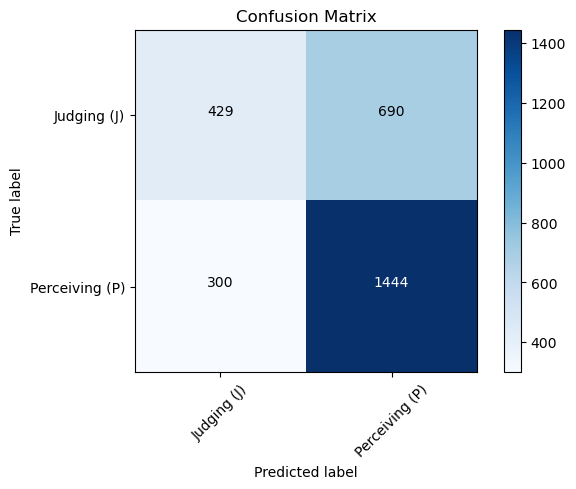

In [93]:
from sklearn.metrics import confusion_matrix
import itertools
import re

# setup parameters for xgboost
param = {}

param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators[l], accuracy * 100.0))
    
    #confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_class = re.split(' / | – |: | - ', type_indicators[l])
    plot_confusion_matrix(cm, [cm_class[1], cm_class[2]], title="Confusion Matrix")


In [106]:
print("MBTI 1st row: %s" % translate_back(list_personality[0,:]))
print("Y: Binarized MBTI 1st row: %s" % list_personality[0,:])

MBTI 1st row: INFJ
Y: Binarized MBTI 1st row: [0 0 0 0]


In [99]:
# testing  example data
posts  = """Exploring the world of data science and machine learning has become easier than ever before. A wealth of online tutorials and courses, both free and paid, are available to help newcomers get started in this field. Personally, I've recently delved into the realm of Data Science & Machine Learning through Kaggle.com. In this short piece, I want to share my encounter with the Kaggle Python Docker image, a tool that significantly simplifies the life of a Data Scientist.

Exciting Introduction to Monitoring on AWS.
HPE Software, now known as Micro Focus SW, achieved the platinum reader's choice award in the 2017 #ITAWARDS, specifically in the new category of #CloudMonitoring. They've also obtained certification as an AWS Certified Solutions Architect.

Take a look at my interview on Udacity where I discuss online learning and machine learning. It's a thought-provoking conversation.

The journey from HP Operations Orchestration to CloudSlang has provided valuable insights. You can find out more about it here: http://bit.ly/1Xo41ci

I stumbled upon a post on devopsdigest.com and I'd love to hear your thoughts. It states that "70% of DevOps organizations are dissatisfied with their DevOps Monitoring Tools." Upon further investigation, it turns out that many DevOps organizations employ multiple monitoring tools simultaneously, including Senu, Nagios, LogStash, and SaaS options like DataDog and SignalFX. However, a crucial element is missing: the ability to consolidate alerts and statuses into a single interface. This consolidation is essential for swiftly addressing application and infrastructure performance issues.

While commercial tools for this purpose exist, they might not be fully optimized for DevOps. I'd like to know if you've encountered the lack of consolidated alerts and statuses as a significant challenge in your DevOps project. If so, how did you tackle this problem? Or perhaps a ChatOps approach is the answer?

You might have heard about ChatOps more frequently lately – during conferences, DevOps meet-ups, or even casual conversations with colleagues by the coffee machine. ChatOps, a concept introduced by GitHub, revolves around development, automation, and operations driven by conversations.

Now, the question is: How can operations-focused engineers like me implement and benefit from ChatOps in our organization? Another question follows naturally: How can we integrate our tools into these chat conversations?

Let's kick things off by examining a practical scenario. The Closed Looped Incidents Process (CLIP) can be revamped using ChatOps. With improved communication and collaboration across teams, incident detection to issue resolution in your application or infrastructure can be expedited.

In a forthcoming blog post, I'll delve into my experience with deploying HP Operations Manager i 10.0 (OMi) on HP Helion Public Cloud. This Infrastructure as a Service platform offers a convenient environment to quickly set up a Linux server and install HP Operations Manager i for various use cases. One such example is monitoring workloads across public clouds like AWS and Azure."""

# The type is just a dummy so that the data prep fucntion can be reused
test_data = pd.DataFrame(data={'type': ['INFJ'], 'posts': [posts]})

posts, dummy  = pre_process_data(test_data, remove_stop_words=True)

my_X_count = cntizer.transform(posts)
my_X_tfidf =  tfizer.transform(my_X_count).toarray()

1 of 1 rows


In [124]:
print("The result is: ", translate_back(result))

The result is:  INTJ


In [100]:
# Lists to store accuracies for each type indicator
accuracies = []

# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))

    Y = list_personality[:, l]

    # split data into train and test sets
    seed = 200
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    
    # calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    result.append(y_pred[0])
    print("* %s prediction: %s" % (type_indicators[l], y_pred))
    print("* Accuracy: %.2f" % accuracy)

# Print the average accuracy across all type indicators
print("Average Accuracy: %.2f" % (sum(accuracies) / len(accuracies)))

IE: Introversion (I) / Extroversion (E) ...
* IE: Introversion (I) / Extroversion (E) prediction: [0 0 0 ... 0 0 0]
* Accuracy: 0.79
NS: Intuition (N) – Sensing (S) ...
* NS: Intuition (N) – Sensing (S) prediction: [0 0 0 ... 0 0 0]
* Accuracy: 0.86
FT: Feeling (F) - Thinking (T) ...
* FT: Feeling (F) - Thinking (T) prediction: [0 0 0 ... 1 0 0]
* Accuracy: 0.74
JP: Judging (J) – Perceiving (P) ...
* JP: Judging (J) – Perceiving (P) prediction: [1 0 1 ... 1 1 1]
* Accuracy: 0.65
Average Accuracy: 0.76


In [107]:
# setup parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

result = []
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    Y = list_personality[:,l]

    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    
    # make predictions for the test data
    y_pred = model.predict(my_X_tfidf)
    result.append(y_pred[0])
    # print("* %s prediction: %s" % (type_indicators[l], y_pred))

IE: Introversion (I) / Extroversion (E) ...
NS: Intuition (N) – Sensing (S) ...
FT: Feeling (F) - Thinking (T) ...
JP: Judging (J) – Perceiving (P) ...
